In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [51]:
data = pd.read_csv("/content/spam.csv",encoding = 'latin-1')

In [52]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [53]:
data = data[['v1',"v2"]]

In [54]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [55]:
data.isnull().sum()

v1    0
v2    0
dtype: int64

In [56]:
data1= data.replace(['ham','spam'],[0, 1])


In [57]:
data1.shape

(5572, 2)

In [58]:

y = pd.DataFrame(data1['v1'])
text =  list(data1['v2'])

In [59]:
type(text)

list

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer

v = TfidfVectorizer()

# TD-IDF Matrix
X = v.fit_transform(text)                  #text to numpy



In [61]:
X.shape

(5572, 8672)

In [62]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data1['v2'])
vectorizer.get_feature_names_out()
print(X.shape)

(5572, 8672)


In [63]:
y

,v1
0,0
1,0
2,1
3,0
4,0
...,...
5567,1
5568,0
5569,0
5570,0


In [64]:
y.shape

(5572, 1)

In [65]:
X.shape

(5572, 8672)

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train,X_test,y_train,y_test = train_test_split(X,y, train_size = 0.75, random_state = 0)


In [68]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4179, 8672)
(1393, 8672)
(4179, 1)
(1393, 1)


In [69]:
X_train.shape

(4179, 8672)

# Model_building

#SVM model classifier

In [70]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import svm

In [71]:
model = SVC()
model = svm.SVC(kernel='linear')
model.fit(X, y)



SVC(kernel='linear')

In [72]:
y_pred = model.predict(X_test)

In [73]:
# performance
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

In [74]:
confusion_matrix(y_test,y_pred)

array([[1196,    0],
       [   2,  195]])

In [75]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1196
           1       1.00      0.99      0.99       197

    accuracy                           1.00      1393
   macro avg       1.00      0.99      1.00      1393
weighted avg       1.00      1.00      1.00      1393



# Random forest Classifier

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [77]:
model2 = RandomForestClassifier(max_depth=2, random_state=0)

In [78]:
model2.fit(X, y)

RandomForestClassifier(max_depth=2, random_state=0)

In [79]:
y_pred = model2.predict(X_test)

In [80]:
# performance
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

In [81]:
confusion_matrix(y_test,y_pred)

array([[1196,    0],
       [ 197,    0]])

In [82]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1196
           1       0.00      0.00      0.00       197

    accuracy                           0.86      1393
   macro avg       0.43      0.50      0.46      1393
weighted avg       0.74      0.86      0.79      1393



#  VISUALIZation DATA

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fef6f0624c0>,
      dtype=object)

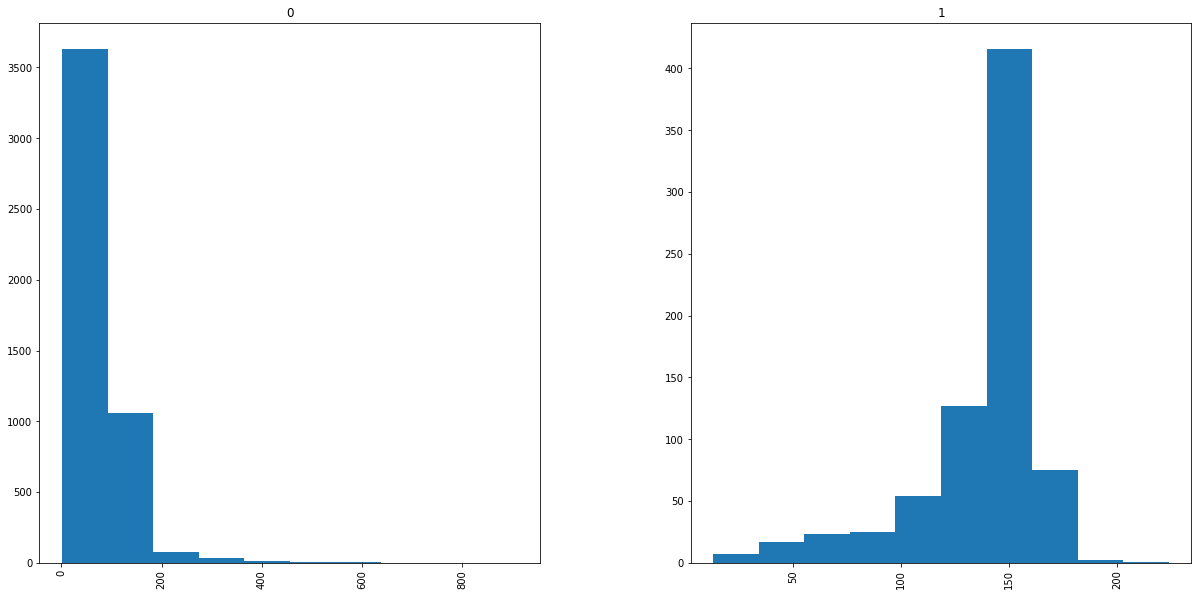

In [83]:
data1['string_len'] = data1['v2'].map(lambda x: len(x))

data1.hist(column='string_len', by='v1', bins=10, figsize=(20,10))

In [84]:
# I have used four different models like [svm,Random forest,] and finally random forest has given correct accuracy .

#Saving our model

In [85]:
import joblib

In [86]:
joblib.dump(model2,"SPAM_Model.pkl")

['SPAM_Model.pkl']

# Loading our details

In [87]:
import joblib

In [88]:
model2 = joblib.load("SPAM_Model.pkl")